**Index:**
1. Cabon dioxide levels in the atmosphere
2. Global temperature
3. Results

# 1. CARBON DIOXIDE CONCENTRATION LEVELS

Exploratory analysis of the carbon dioxide dataset.

In [1]:
# Importing standard libraries
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import plotly.plotly as py
import seaborn as sns

from scipy import stats
from statsmodels.formula.api import ols

In [2]:
# Importing data
co2 = pd.read_csv('/Users/anna/data/climate-change/datasets/clean_co2.csv')
co2.head()

,Year,Month,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),CO2
0,1958,3,1958.2027,315.69,314.42,316.18,314.89
1,1958,4,1958.2877,317.45,315.15,317.30,314.98
2,1958,5,1958.3699,317.50,314.73,317.83,315.06
3,1958,7,1958.5370,315.86,315.17,315.87,315.21
4,1958,8,1958.6219,314.93,316.17,314.01,315.29


# Annual mean

In [3]:
# Annual mean
co2_mean = co2.groupby('Year').mean().reset_index()
co2_mean.head()

,Year,Month,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),CO2
0,1958,7.375,1958.569525,315.330000,315.292500,315.253750,315.218750
1,1959,6.500,1959.497258,315.981667,315.976667,315.998333,315.994167
2,1960,6.500,1960.498192,316.908333,316.906667,316.905833,316.905000
3,1961,6.500,1961.497258,317.645000,317.640000,317.629167,317.625000
4,1962,6.500,1962.497258,318.453333,318.448333,318.455000,318.450000


In [4]:
co2_mean = co2_mean[['Year', 'CO2']]
co2_mean.head()

,Year,CO2
0,1958,315.218750
1,1959,315.994167
2,1960,316.905000
3,1961,317.625000
4,1962,318.450000


In [5]:
# Saving annual mean dataset
co2_mean.to_csv('/Users/anna/data/climate-change/datasets/clean_co2_mean.csv', index=False)

## Plotting

####  Decomposing to check the trend, seasonality and noise separately

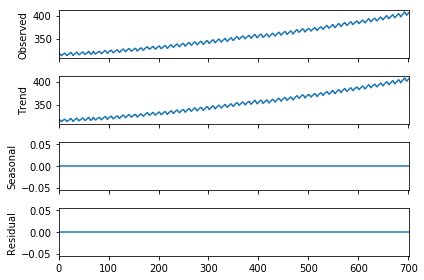

In [6]:
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

series = co2['Carbon Dioxide (ppm)']
result = seasonal_decompose(series, model='additive', freq=1)
result.plot()
pyplot.show()

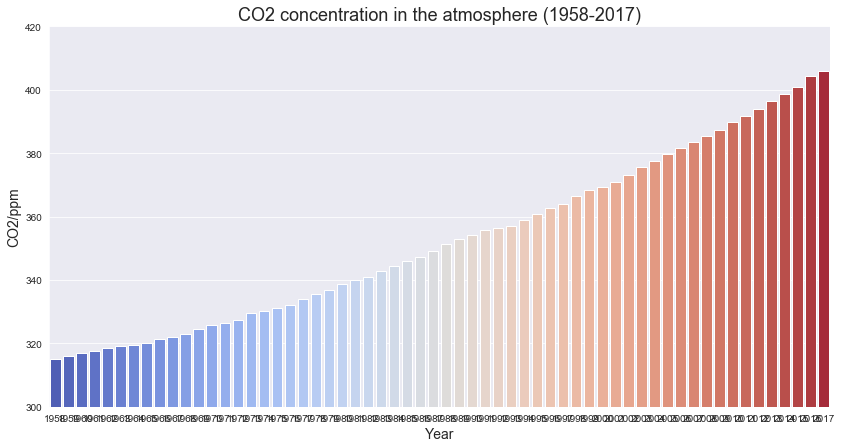

In [7]:
sns.set_style("darkgrid")
plt.figure(figsize=(14, 7))
sns.barplot(x='Year', 
             y='CO2', 
             data=co2_mean, palette='coolwarm')
plt.title('CO2 concentration in the atmosphere (1958-2017)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('CO2/ppm', fontsize=14)
plt.ylim(300, 420)
plt.show()

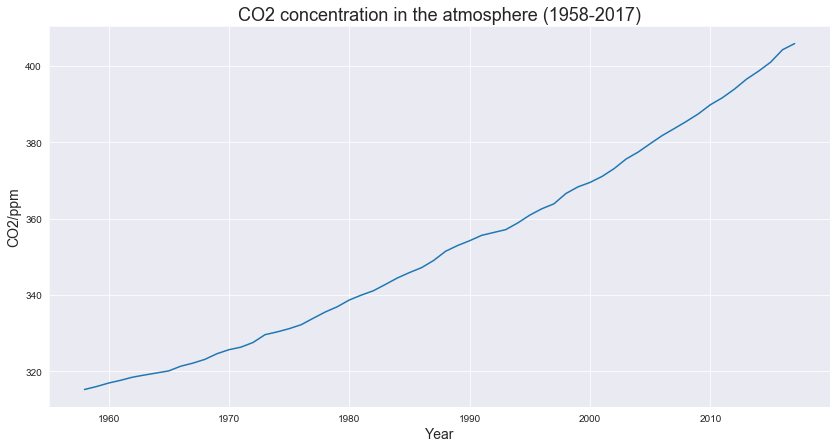

In [15]:
#Plotting annual mean dataset
plt.figure(figsize=(14, 7))
sns.lineplot(x='Year', 
             y='CO2', 
             data=co2_mean)
plt.title('CO2 concentration in the atmosphere (1958-2017)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('CO2/ppm', fontsize=14)
plt.show()

# 2. TEMPERATURE

In [32]:
# Importing data
temp = pd.read_csv('/Users/anna/data/climate-change/datasets/clean_temp.csv')
temp.head()

,Date,AvgTemp
0,1850-01-01,12.833
1,1850-02-01,13.588
2,1850-03-01,14.043
3,1850-04-01,14.667
4,1850-05-01,15.507


Fixing type of the Year column again because I don't why it is not showing.

In [34]:
temp.Date = pd.to_datetime(temp.Date)

In [35]:
temp.dtypes

Date       datetime64[ns]
AvgTemp           float64
dtype: object

The types are correct now.

## Annual mean

In [36]:
temp['year'] = temp['Date'].dt.year

In [37]:
temp_mean = temp.groupby([(temp['year'])]).mean().reset_index()
temp_mean.head()

,year,AvgTemp
0,1850,14.867167
1,1851,14.991833
2,1852,15.006500
3,1853,14.955167
4,1854,14.991000


In [38]:
# Saving annual mean dataset
temp_mean.to_csv('/Users/anna/data/climate-change/datasets/clean_temp_mean.csv', index=False)
temp_mean.head()

,year,AvgTemp
0,1850,14.867167
1,1851,14.991833
2,1852,15.006500
3,1853,14.955167
4,1854,14.991000


## Average global temperature per year

Text(0, 0.5, 'Avg. temp/ C')

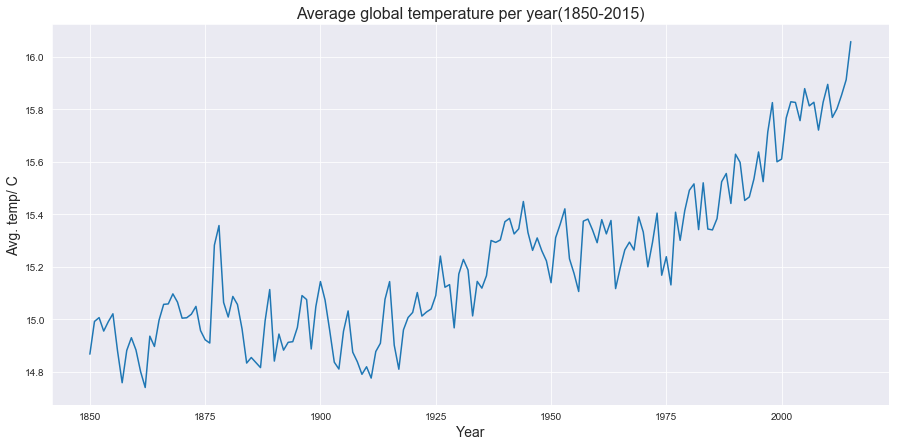

In [40]:
# Plotting avg. temp / year and using moving averages to smooth the result

temp_mov = temp_mean.rolling(window=1).mean()

sns.set_style("darkgrid")
plt.figure(figsize=(15, 7))
sns.lineplot(x='year', 
             y='AvgTemp', 
             data=temp_mov)
plt.title('Average global temperature per year(1850-2015)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Avg. temp/ C', fontsize=14)

Text(0, 0.5, 'Avg. temp/ C')

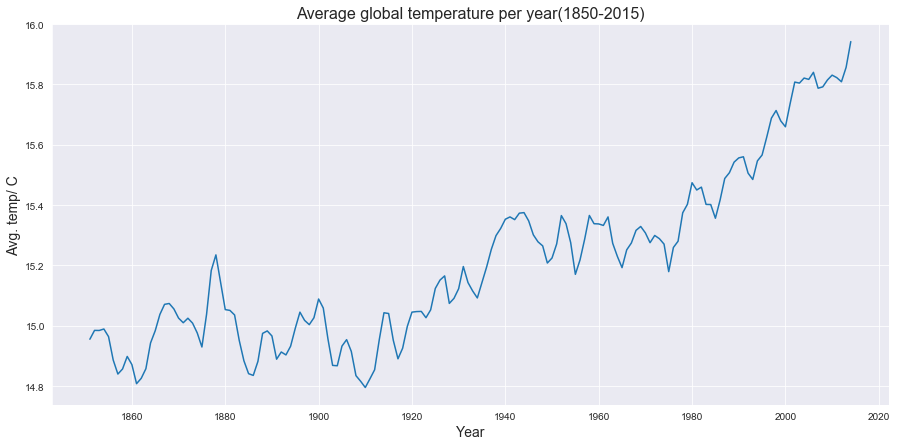

In [41]:
# Trying different windows for the moving average
temp_mov = temp_mean.rolling(window=3).mean()

sns.set_style("darkgrid")
plt.figure(figsize=(15, 7))
sns.lineplot(x='year', 
             y='AvgTemp', 
             data=temp_mov)
plt.title('Average global temperature per year(1850-2015)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Avg. temp/ C', fontsize=14)

Text(0, 0.5, 'Avg. temp/ C')

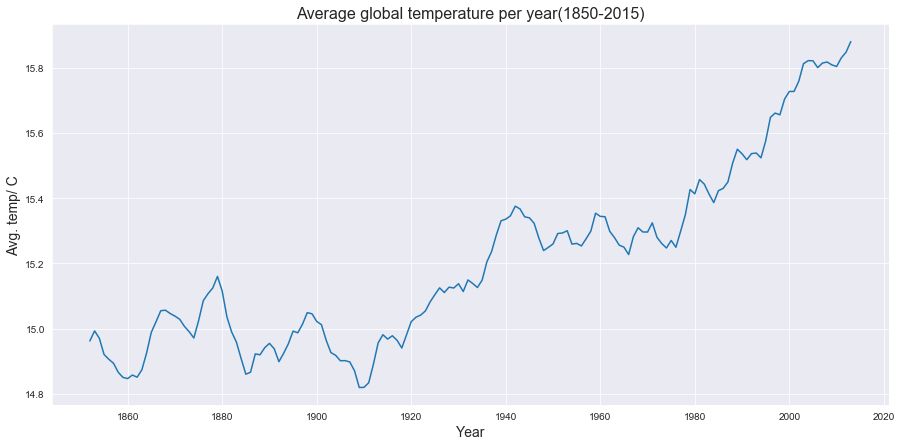

In [42]:
temp_mov = temp_mean.rolling(window=5).mean()

sns.set_style("darkgrid")
plt.figure(figsize=(15, 7))
sns.lineplot(x='year', 
             y='AvgTemp', 
             data=temp_mov)
plt.title('Average global temperature per year(1850-2015)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Avg. temp/ C', fontsize=14)

# 3. RESULTS

From the lineplot of the carbon dioxide cocentration levels we see a positive tendency, increasing with time.

In the heatmap we see that when we look at the global data, every year the concentration of CO2 levels in the atmosphere increases, but if we try to look at it month by month, in the same year, the difference is too small to be perceived. This is a problem when trying to communicate the importance of the topic to society because we don't see things changing in our daily basis, only if we look backwards or make predictions for the future.

Temperature seems to be following an positive trend, increasing 1C in the last 150 years.